In [2]:
"""
Script to implement the economic functions with a simple doublet example

SPE Hackathon 2021

author: Alexandros Daniilidis
contact: a.daniilidis@tudelft.nl
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load example simulation data
data = pd.read_excel('Test_time_data.xlsx')
data

,Unnamed: 0,time,I1 : water rate (m3/day),I1 : temperature (K),I1 : steam rate (m3/day),I1 : energy (KJ/day),P1 : steam rate (m3/day),P1 : energy (KJ/day),I1 : BHP (bar),P1 : water rate (m3/day),P1 : temperature (K),P1 : BHP (bar),FIPS c 0 (kmol),Time (yrs)
0,0,0.0001,7208.838311,303.150058,0,1.059031e+09,0,-2.270802e+09,210.787922,-7197.425371,345.915067,185.041404,3.127039e+14,2.737851e-07
1,1,0.0009,7199.955310,303.150082,0,1.062858e+09,0,-2.270997e+09,218.673606,-7199.997366,345.958919,182.299576,3.127039e+14,2.464066e-06
2,2,0.0073,7199.990408,303.150017,0,1.065212e+09,0,-2.267812e+09,222.303292,-7199.994315,345.922469,179.084073,3.127039e+14,1.998631e-05
3,3,0.0585,7199.993962,303.150011,0,1.067073e+09,0,-2.265161e+09,225.182672,-7199.996063,345.894613,176.310082,3.127039e+14,1.601643e-04
4,4,0.4681,7199.996532,303.150006,0,1.068480e+09,0,-2.263389e+09,227.364850,-7199.998177,345.881178,174.241148,3.127039e+14,1.281588e-03
5,5,3.7449,7199.998794,303.150002,0,1.069309e+09,0,-2.263718e+09,228.651880,-7199.998886,345.909734,173.538240,3.127039e+14,1.025298e-02
6,6,29.9593,7199.999752,303.150000,0,1.071102e+09,0,-2.266098e+09,231.440986,-7200.000000,345.995738,173.484122,3.127039e+14,8.202409e-02
7,7,239.6745,7199.999815,303.150000,0,1.072888e+09,0,-2.268419e+09,234.226947,-7200.000000,346.078470,173.487469,3.127039e+14,6.561930e-01
8,8,365.0000,7199.999653,303.150001,0,1.073330e+09,0,-2.269026e+09,234.918795,-7199.999415,346.100183,173.487664,3.127039e+14,9.993155e-01
9,9,730.0000,7199.999991,303.150000,0,1.073974e+09,0,-2.269816e+09,235.926602,-7200.000000,346.128671,173.477106,3.127039e+14,1.998631e+00


In [3]:
# check available collumns in the dataset
data.columns.tolist()


['Unnamed: 0',
 'time',
 'I1 : water rate (m3/day)',
 'I1 : temperature (K)',
 'I1 : steam rate (m3/day)',
 'I1 : energy (KJ/day)',
 'P1 : steam rate (m3/day)',
 'P1 : energy (KJ/day)',
 'I1 : BHP (bar)',
 'P1 : water rate (m3/day)',
 'P1 : temperature (K)',
 'P1 : BHP (bar)',
 'FIPS c 0 (kmol)',
 'Time (yrs)']

In [4]:
# list the collumn names that should be removed
press_gridcells = data.filter(like='reservoir').columns.tolist()
chem_cols = data.filter(like='kmol/day').columns.tolist()

# remove collumns from data
data.drop(columns=press_gridcells + chem_cols, inplace=True)

data

,Unnamed: 0,time,I1 : water rate (m3/day),I1 : temperature (K),I1 : steam rate (m3/day),I1 : energy (KJ/day),P1 : steam rate (m3/day),P1 : energy (KJ/day),I1 : BHP (bar),P1 : water rate (m3/day),P1 : temperature (K),P1 : BHP (bar),FIPS c 0 (kmol),Time (yrs)
0,0,0.0001,7208.838311,303.150058,0,1.059031e+09,0,-2.270802e+09,210.787922,-7197.425371,345.915067,185.041404,3.127039e+14,2.737851e-07
1,1,0.0009,7199.955310,303.150082,0,1.062858e+09,0,-2.270997e+09,218.673606,-7199.997366,345.958919,182.299576,3.127039e+14,2.464066e-06
2,2,0.0073,7199.990408,303.150017,0,1.065212e+09,0,-2.267812e+09,222.303292,-7199.994315,345.922469,179.084073,3.127039e+14,1.998631e-05
3,3,0.0585,7199.993962,303.150011,0,1.067073e+09,0,-2.265161e+09,225.182672,-7199.996063,345.894613,176.310082,3.127039e+14,1.601643e-04
4,4,0.4681,7199.996532,303.150006,0,1.068480e+09,0,-2.263389e+09,227.364850,-7199.998177,345.881178,174.241148,3.127039e+14,1.281588e-03
5,5,3.7449,7199.998794,303.150002,0,1.069309e+09,0,-2.263718e+09,228.651880,-7199.998886,345.909734,173.538240,3.127039e+14,1.025298e-02
6,6,29.9593,7199.999752,303.150000,0,1.071102e+09,0,-2.266098e+09,231.440986,-7200.000000,345.995738,173.484122,3.127039e+14,8.202409e-02
7,7,239.6745,7199.999815,303.150000,0,1.072888e+09,0,-2.268419e+09,234.226947,-7200.000000,346.078470,173.487469,3.127039e+14,6.561930e-01
8,8,365.0000,7199.999653,303.150001,0,1.073330e+09,0,-2.269026e+09,234.918795,-7199.999415,346.100183,173.487664,3.127039e+14,9.993155e-01
9,9,730.0000,7199.999991,303.150000,0,1.073974e+09,0,-2.269816e+09,235.926602,-7200.000000,346.128671,173.477106,3.127039e+14,1.998631e+00


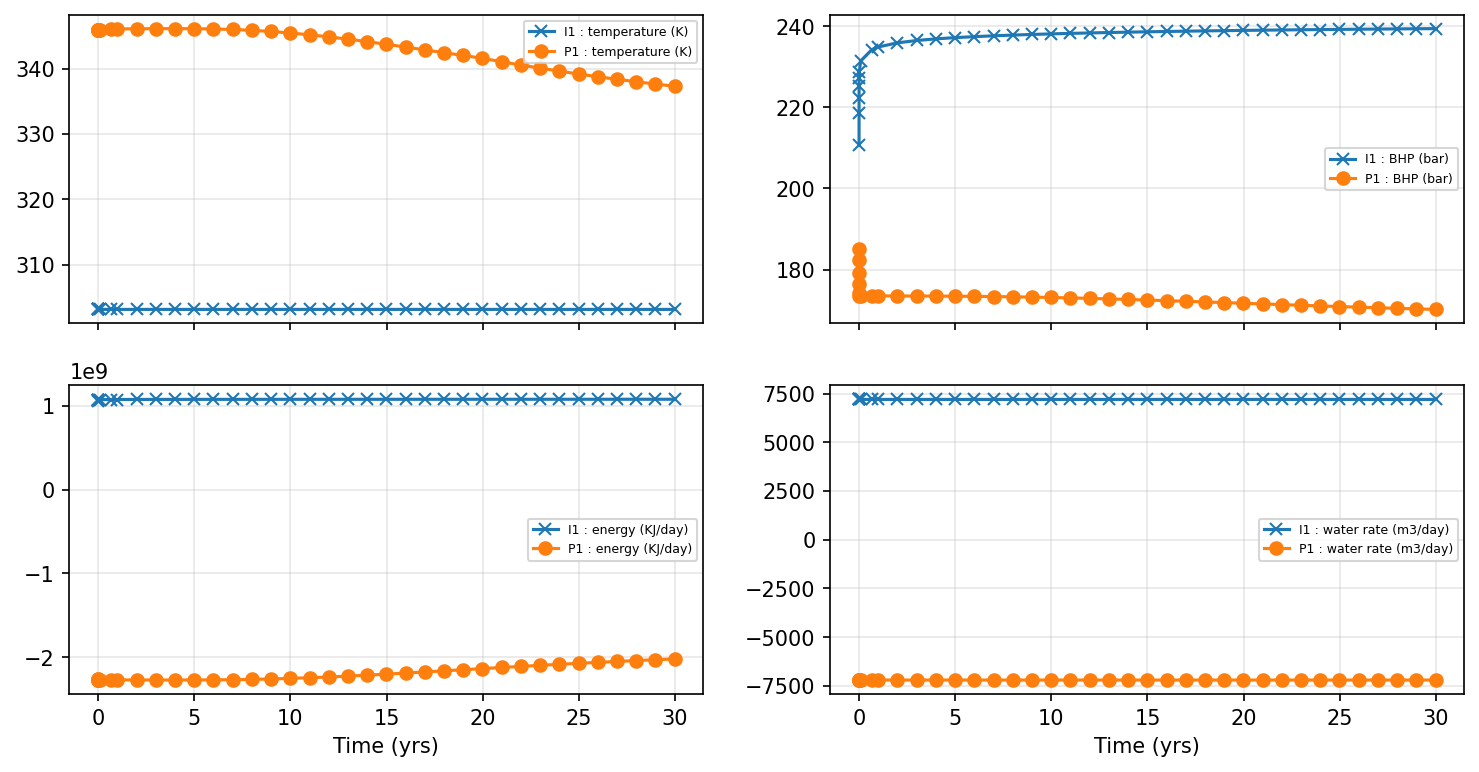

In [5]:
# do a first plot to get an overview of our data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','energy (KJ/day)','water rate (m3/day)']):
    data.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

plt.show()

In [6]:

# assign datetime as index
data['Datetime'] = pd.to_datetime('1/1/2000') + pd.to_timedelta(
    data['Time (yrs)'] * pd.Timedelta(('365 days')), unit='s')
data.set_index('Datetime', inplace=True)


# set the new time interval
set_interval = '365D'

# generate the new index on which the data should correspond based on original index range
resample_index = pd.date_range(data.index[0] - pd.Timedelta(set_interval),
                               data.index[-1] + pd.Timedelta(set_interval), freq=set_interval, normalize=True,
                               closed='right')

# create a new index as the union of the old and new index and interpolate on the combined index
# then reindex the dataframe to the new index
tdata = data.reindex(data.index.union(resample_index)).interpolate('index').reindex(resample_index)

# maintain initial values of original dataset in the newly indexed one at the edges
tdata.iloc[0] = data.iloc[0]
tdata.iloc[-1] = data.iloc[-1]

# add the number of periods for further economic assessment
tdata['econ_periods'] = np.arange(len(tdata))

In [7]:

# compute the deltahours for economic and energy assessments
tdata['Deltahours'] = tdata.index.to_series().diff(1) / pd.Timedelta('1 hour')

# verify that we only have one delta
tdata['Deltahours'].unique()


array([  nan, 8760.])

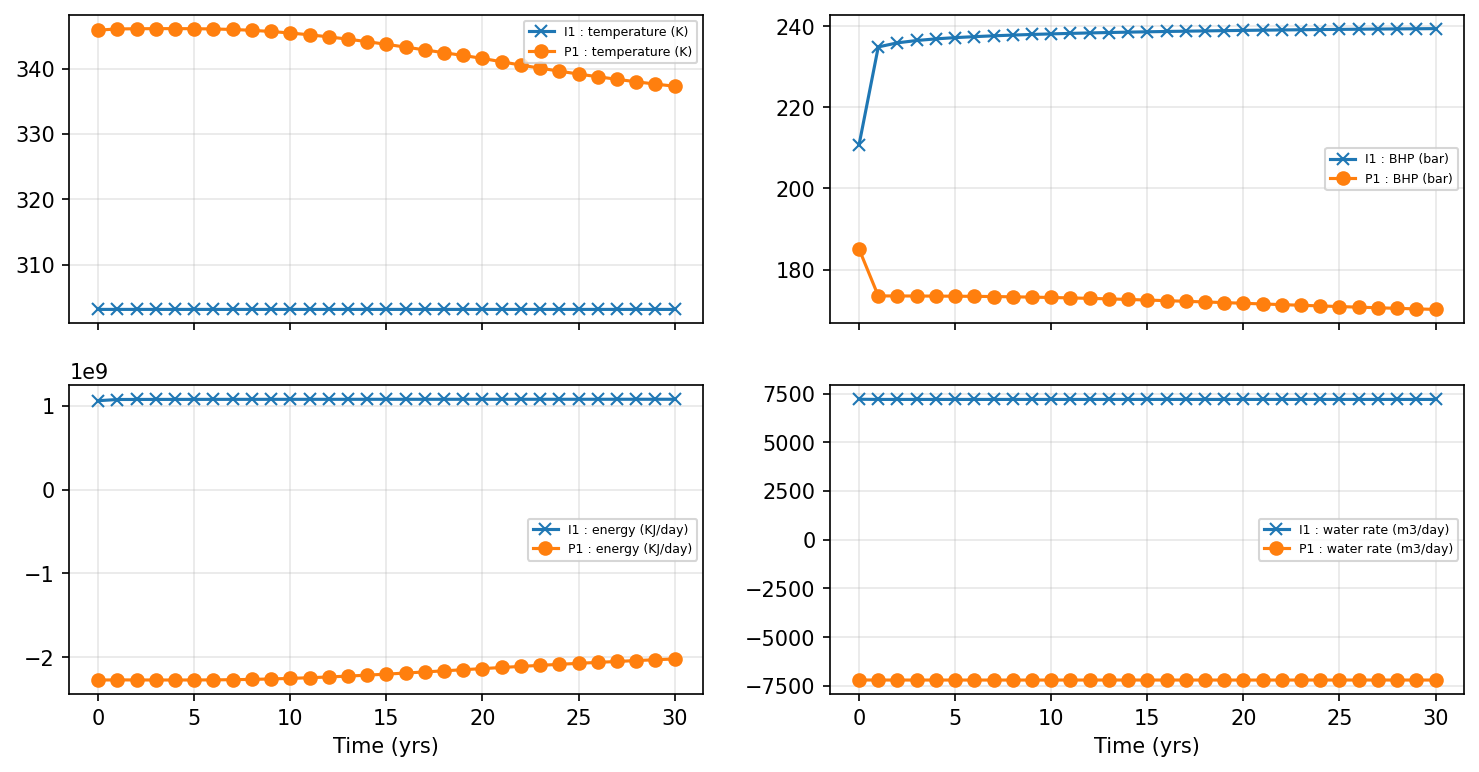

In [8]:
# recompute time columns based on index
tdata['Time (yrs)'] = pd.to_timedelta(tdata.index - tdata.index[0]).total_seconds() / (365 * 24 * 60 * 60)

# reset index to time delta
tdata.set_index(pd.to_timedelta(tdata['Time (yrs)'] * pd.Timedelta(('365 days')), unit='s'), inplace=True)
tdata.drop(columns='time', inplace=True)


# do a quick plot to get an overview of our treated data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','energy (KJ/day)','water rate (m3/day)']):
    tdata.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

plt.show()


Levelized Cost of Heat (LCOH)
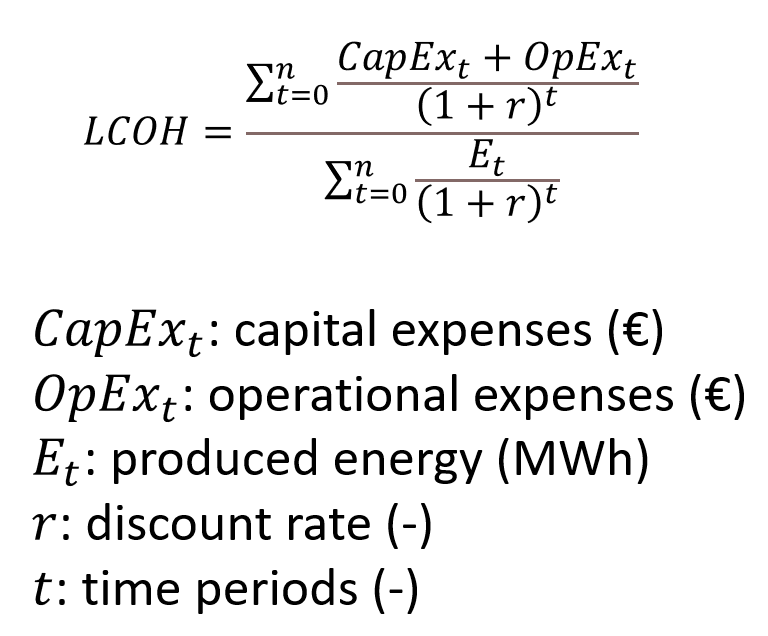

In [9]:
kJ_day_MW = 1/3.6e6/24

# compute system power
tdata['System power (MW)'] = (abs(tdata['P1 : energy (KJ/day)']) - abs(tdata['I1 : energy (KJ/day)']))\
                                       * kJ_day_MW

# compute produced energy
tdata['Produced Energy (MWh)'] = tdata['System power (MW)'] * tdata['Deltahours']



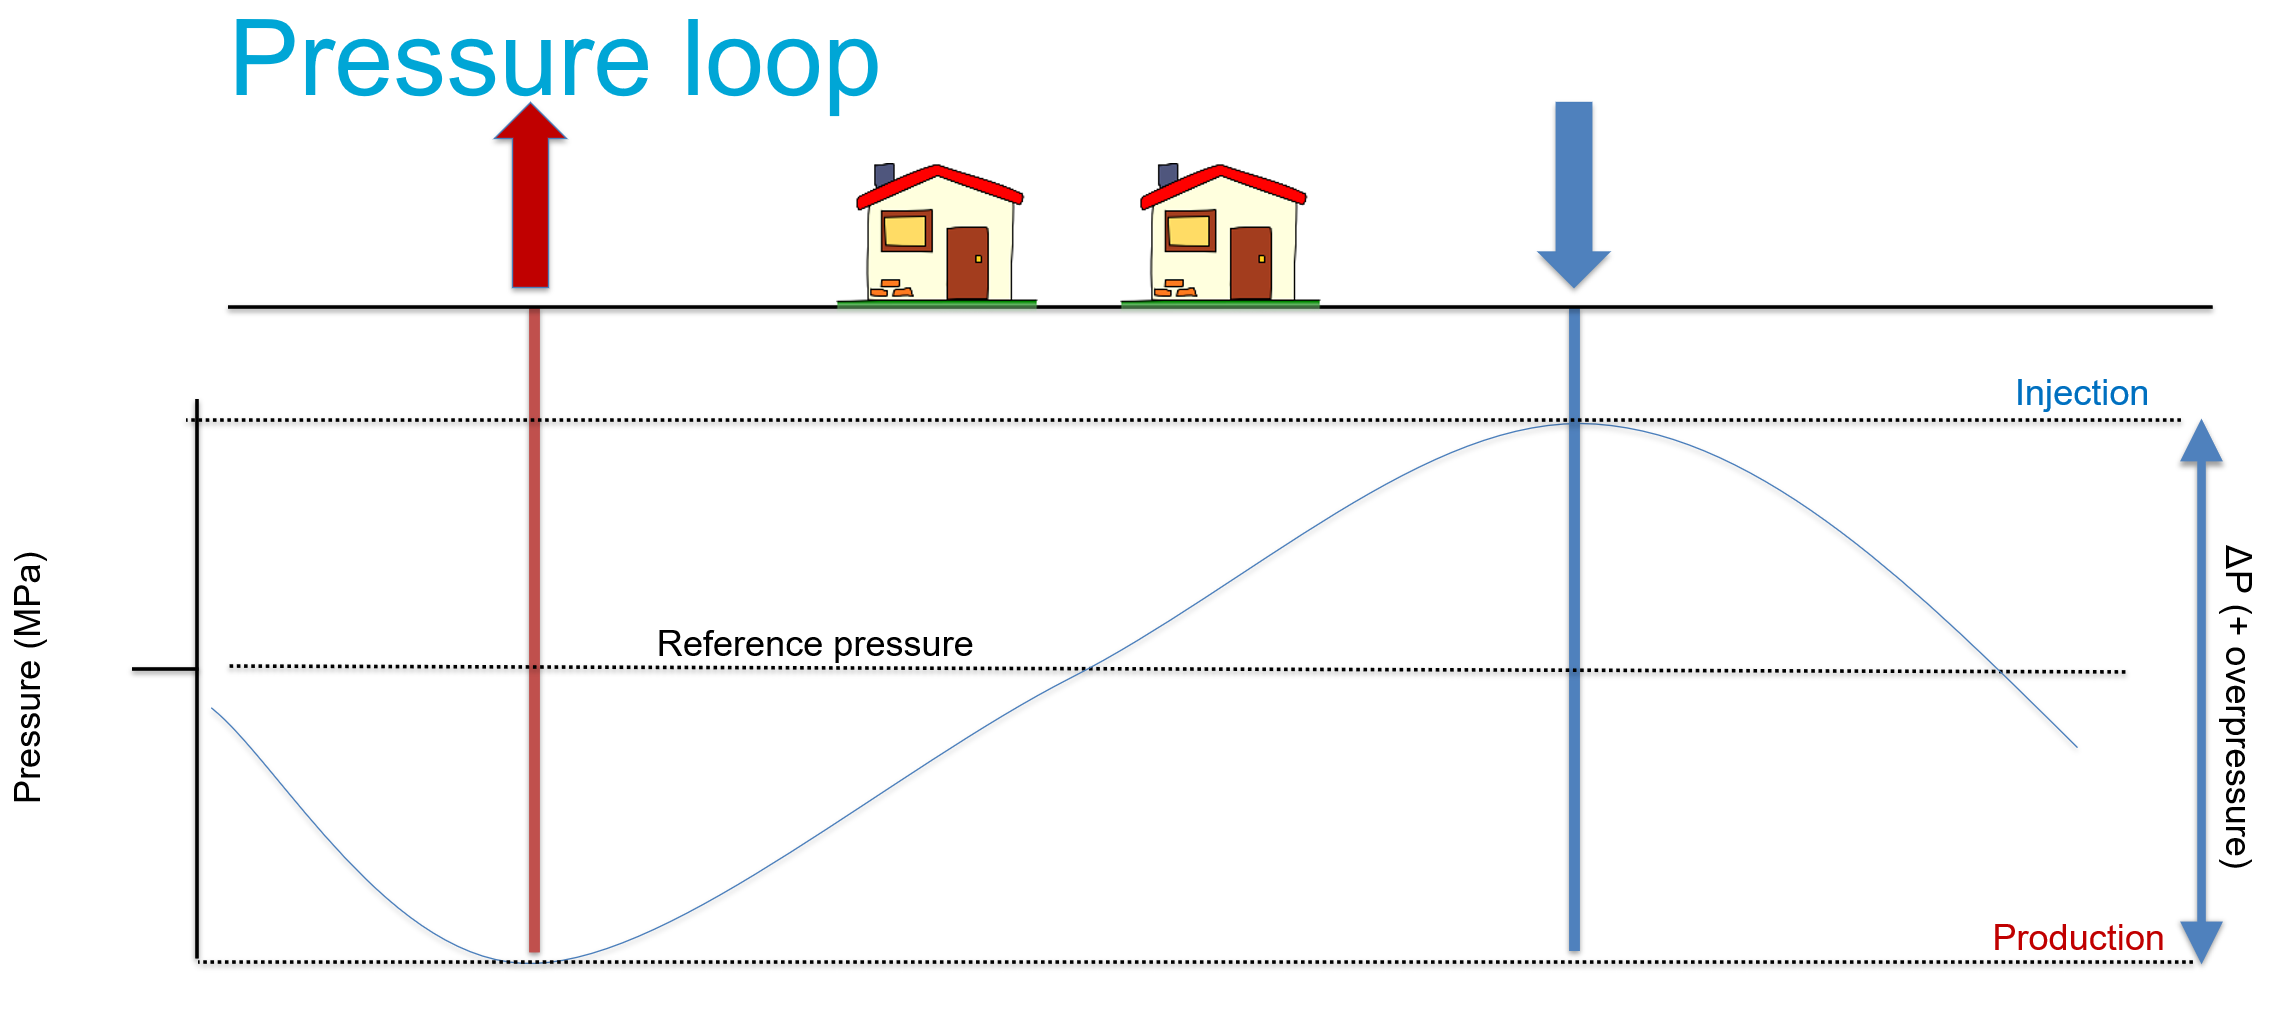


In [10]:
# compute the pressured drop
tdata['Pump dp (MPa)'] = abs(tdata['P1 : BHP (bar)'] * 0.1) \
                                    - abs(tdata['I1 : BHP (bar)']*0.1)



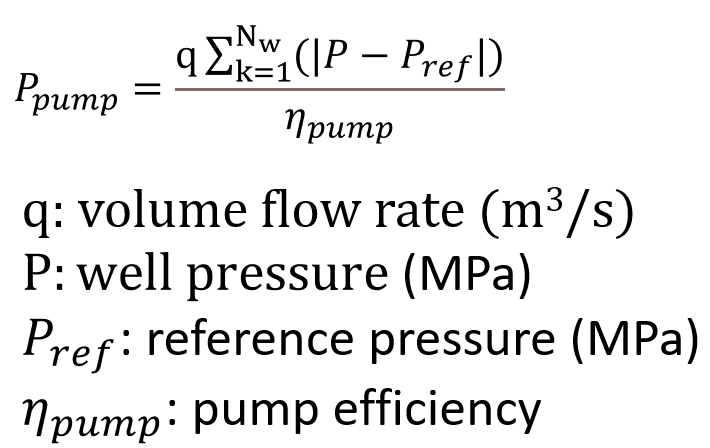

In [11]:
m3_day_m3_sec = 1 / (24 * 60 * 60)
pump_efficiency = 0.5

# compute the pumping power
tdata['Pump power (MW)'] = abs(tdata['Pump dp (MPa)']) * \
                             abs(tdata['I1 : water rate (m3/day)']) * m3_day_m3_sec / pump_efficiency

# compute the pumping costs
electricity_price = 100 # euro/MWh
tdata['OpEx_pump (\u20ac)'] = tdata['Pump power (MW)'] * tdata['Deltahours'] * electricity_price

In [12]:
# assign the CapEx for drilling the wells
tdata['CapEx (\u20ac)'] = 0
tdata.loc[tdata.index == tdata.index[0], 'CapEx (\u20ac)'] = 2 * 4113000

periodic_OpEx_rate = 0.05
# calculate variable OpEx costs
tdata['OpEx (\u20ac)'] = tdata['CapEx (\u20ac)'].cumsum() * periodic_OpEx_rate

# calculate LCOH
periodic_discount_rate = 0.05

# compute the LCOH costs
tdata['LCOH costs'] = tdata['CapEx (\u20ac)'].fillna(0) \
                        + tdata['OpEx (\u20ac)'] \
                          + tdata['OpEx_pump (\u20ac)'].fillna(0)

# discount LCOH costs
tdata['discounted LCOH costs'] = (tdata['LCOH costs'] /
                                      (1 + periodic_discount_rate) ** tdata['econ_periods']).cumsum()

tdata['discounted LCOH energy'] = (tdata['Produced Energy (MWh)'].cumsum() /
                                        (1 + periodic_discount_rate) ** tdata[
                                            'econ_periods']).cumsum()

tdata[r'LCOH (€/MWh)'] = tdata['discounted LCOH costs'] / tdata['discounted LCOH energy']


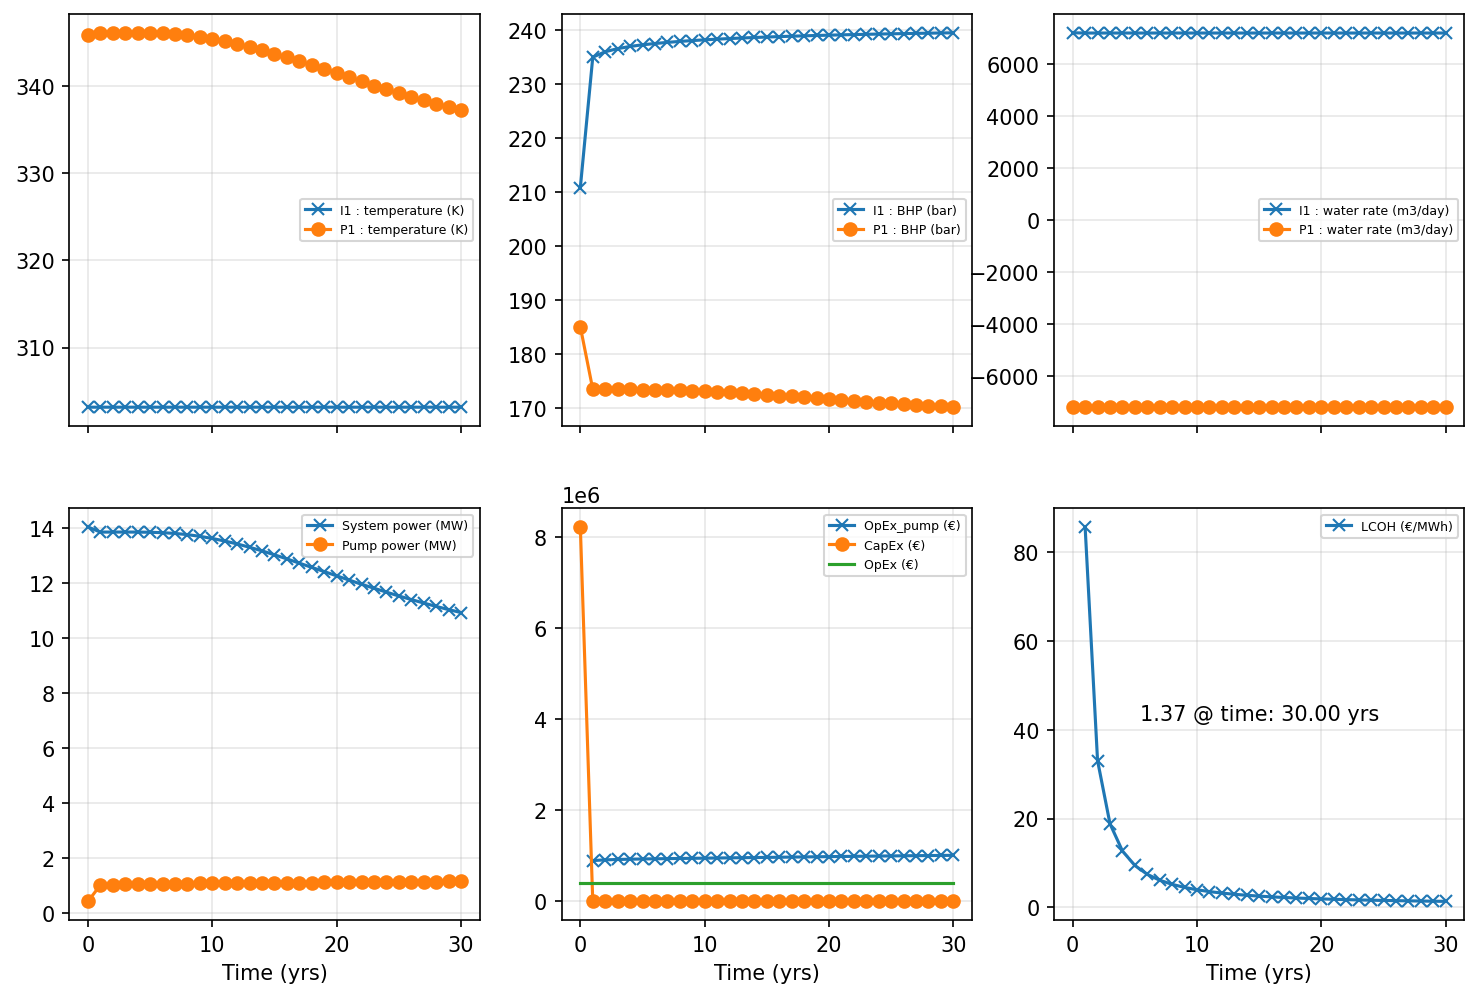

In [13]:
# do our final plot with the overview
# define a plot
fig, ax = plt.subplots(2,3, figsize=(12,8), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','water rate (m3/day)',
                         'power', 'Ex','LCOH (€/MWh)']):
    tdata.plot(x='Time (yrs)',
              y=tdata.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)
    if key == 'LCOH (€/MWh)':
        ax_list[i].annotate('%0.2f @ time: %.2f yrs' % (tdata[key].iloc[-1], tdata['Time (yrs)'].iloc[-1]),
                            xy=(0.5, 0.5), va='center', ha='center',
                            xycoords=('axes fraction'))


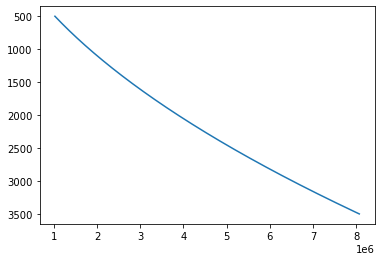

In [14]:
def drillingcostnl(depth):
    """
    Calculate the cost of drilling as a function of depth
    Reference source:
        https://www.thermogis.nl/en/economic-model

    :param depth: float
        measured depth along hole in meters

    :return: float
        costs in euros
    """
    drilling_cost_nl = 375000 + 1150 * depth + 0.3 * depth ** 2
    return(drilling_cost_nl)

depth = np.arange(500, 3500, 1)
costs = drillingcostnl(depth)

fig, ax = plt.subplots()
ax.plot(costs, depth)
ax.invert_yaxis()


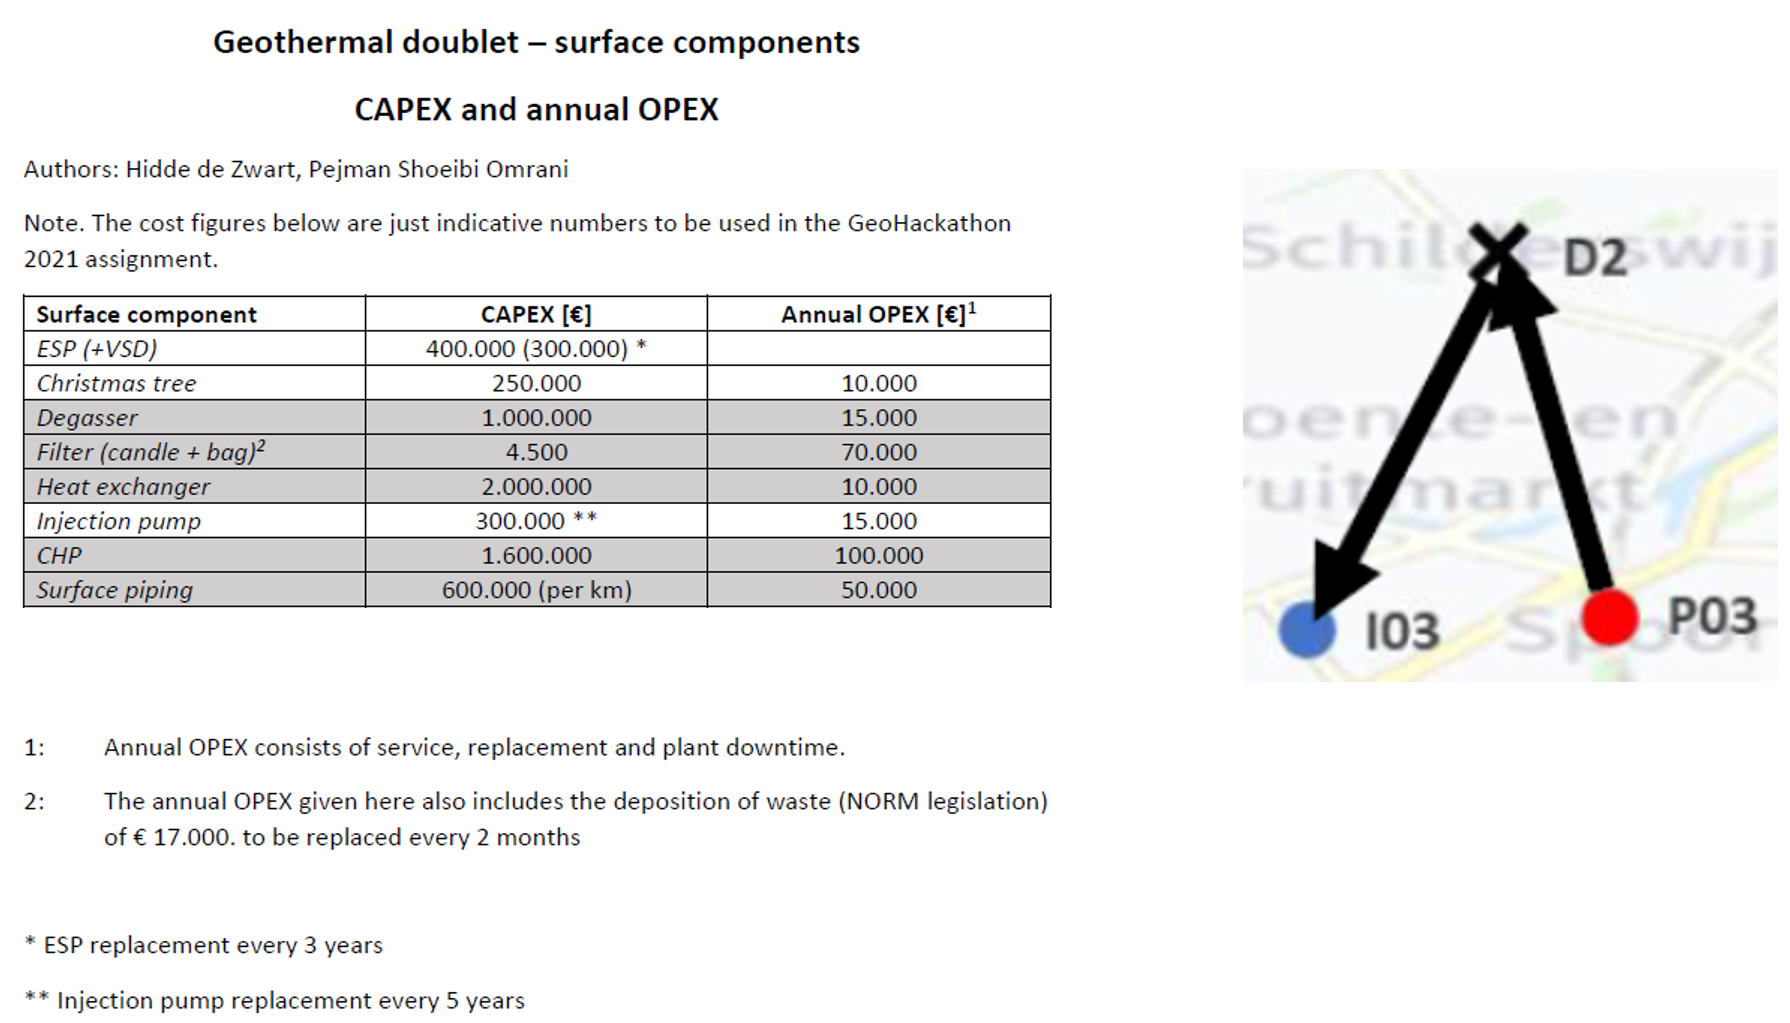